# Setting Up

In [1]:
!nvidia-smi

Thu Aug 31 02:54:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 935.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install --upgrade sqlalchemy torch torchaudio torchdata torchtext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ohmeow-blurr 1.0.5 require

In [5]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ML/QA_Classifier

# Data

In [8]:
df = pd.read_csv("questions_details.csv")
df.head()

,Title,URL,Question,Categories
0,your browser version is not supported using symfony browserkit,https://stackoverflow.com/questions/76981459/your-browser-version-is-not-supported-using-symfony-browserkit,"I'm trying to automate some features and I need to scarp a web page.So, I'm using browserkit to make external request to website.Everything seems good but there's no useful result in my response because target page is using modern JavaScript.Let's take a look :PHP filerequire ""./vendor/autoload.php"";use Symfony\Component\HttpClient\HttpClient;$client = HttpClient::create([ 'max_redirects' => 7,]);$response = $client->request( 'GET', 'https://secure.e-konsulat.gov.pl');$statusCode = $response->getStatusCode();$contentType = $response->getHeaders()['content-type'][0];$content = $res...","['php', 'symfony', 'web-scraping']"
1,how to get button text value in java,https://stackoverflow.com/questions/76981456/how-to-get-button-text-value-in-java,"I want to get button text value to do the on click command, but i can't find the right code to do it. I think I need a code to replace the //button text value// on the code showed below.package test;import javax.swing.*;import java.awt.*;import java.awt.event.*;public class Main implements ActionListener{public static void main(String[] args) { JFrame frame = new JFrame(); frame.setSize(420,420); frame.setLayout(new GridLayout(1,1)); frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE); JButton button = new JButton(); button.setText(""1""); } @Override publ...","['java', 'button']"
2,How to make sure communication is stable when using a ZeroMQ REQ-REP in NodeJs-Golang,https://stackoverflow.com/questions/76981455/how-to-make-sure-communication-is-stable-when-using-a-zeromq-req-rep-in-nodejs-g,"This is my Node codeasync function runClient() { console.log('Connecting to hello world server…'); // Socket to talk to server const sock = new zmq.Request(); sock.connect('tcp://localhost:5555'); let i = 0; while (true) { const msgToSend = 'Hello'; console.log(`Count: ${i} Sending: ${msgToSend}`); await sock.send(msgToSend); const [result] = await sock.receive(); console.log(`Count: ${i} Received: ${result.toString()}`); i++; }}and here's my Golangpackage mainimport ( ""log"" ""time"" zmq ""github.com/pebbe/zmq4"")func mai...","['javascript', 'node.js', 'go', 'zeromq']"
3,Cubical Agda Inclusion Order,https://stackoverflow.com/questions/76981453/cubical-agda-inclusion-order,"I'm almost finished defining an Inclusion Order in Cubical Agda, But I'm stuck proving the second projections are equal for dependent pairs. I would appreciate it if someone can fill in the hole for the antisymmetric relation.{-# OPTIONS --cubical #-}{-# OPTIONS --without-K #-}{-# OPTIONS --safe #-}open import Cubical.Foundations.Preludeopen import Cubical.Foundations.Isomorphismopen import Agda.Primitiveprivate variable l l' al bl : Level A : Type al B : Type bl-- https://en.wikipedia.org/wiki/Partially_ordered_setrecord Poset (A : Type l)(l' : Level) : Type (lsuc (l ⊔ l')) whe...",['agda']
4,How to convert depth map to image(.png) format for open3d to make a pointcloud?,https://stackoverflow.com/questions/76981450/how-to-convert-depth-map-to-image-png-format-for-open3d-to-make-a-pointcloud,"I am using a depth camera which captures a 500x500 depth map in meters. I also have the corresponding RGB image. Now the function - open3d.geometry.RGBDImage.create_from_color_and_depth(RGB_image, depth_image) requires depth image in png form. When I convert the depth map array to a png image, I get an image which is very dark because all the depths are in the range of 3m to 6m.When I finally get the pointcloud using o3d.geometry.PointCloud.create_from_rgbd_image(), the pointcloud is sliced. By sliced I mean that there are discrete layers where a portion of the image is printed.I think I a...","['3d', 'computer-vision', 'point-clouds', 'vision', 'open3d']"


In [9]:
df.shape

(22123, 4)

In [10]:
df.isna().sum()

Title         0
URL           0
Question      0
Categories    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22123 entries, 0 to 22122
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       22123 non-null  object
 1   URL         22123 non-null  object
 2   Question    22123 non-null  object
 3   Categories  22123 non-null  object
dtypes: object(4)
memory usage: 691.5+ KB


In [12]:
df = df.dropna().reset_index(drop=True)
df.shape

(22123, 4)

In [13]:
categories_list = df.Categories.to_list()
category_count = {}
for categories in categories_list:
  category_list = eval(categories)
  for category in category_list:
    if category in category_count.keys():
      category_count[category] += 1
    else:
      category_count[category] = 1
print(f"Number of Categories: {len(category_count)}")
print(category_count)

Number of Categories: 10634
{'php': 592, 'symfony': 45, 'web-scraping': 103, 'java': 1146, 'button': 25, 'javascript': 1951, 'node.js': 625, 'go': 155, 'zeromq': 4, 'agda': 2, '3d': 29, 'computer-vision': 34, 'point-clouds': 4, 'vision': 1, 'open3d': 1, 'spring': 214, 'spring-security': 60, 'oauth-2.0': 47, 'c#': 1004, 'html': 759, 'css': 608, 'vue.js': 168, 'kubernetes': 145, 'kubectl': 19, 'kubernetes-secrets': 1, 'wordpress': 239, 'title': 4, 'opengl': 11, 'linker': 10, 'gnu': 5, 'ld': 7, 'reactjs': 1226, 'unit-testing': 59, 'jestjs': 46, 'ts-jest': 11, 'json': 206, 'extjs': 3, 'ios': 286, 'swift': 246, 'swiftui': 134, 'scrollview': 12, 'python': 2839, 'amazon-web-services': 265, 'terraform': 73, 'terraform-provider-aws': 18, 'terraform0.12+': 1, 'launch-template': 1, 'ffmpeg': 37, 'ffprobe': 3, 'amazon-dynamodb': 26, 'memory-leaks': 14, 'game-engine': 5, 'vulkan': 5, 'godot': 14, 'gdscript': 8, 'tween': 2, 'godot4': 11, 'selenium-webdriver': 199, 'powershell': 157, 'service': 16, '

In [14]:
int(len(df) * 0.005)

110

In [15]:
threshold = int(len(df) * 0.005)
rare_categories = [key for key, value in category_count.items() if value < threshold]
len(rare_categories), rare_categories[:5]

(10565, ['symfony', 'web-scraping', 'button', 'zeromq', 'agda'])

In [16]:
categories_list = df.Categories.to_list()
revised_category_list = []
indices_to_drop = []

for idx, categories in enumerate(categories_list):
  category_list = eval(categories)
  revised_categories = []

  for category in category_list:
    if category not in rare_categories:
      revised_categories.append(category)

  if len(revised_categories) == 0:
    indices_to_drop.append(idx)
  else:
    revised_category_list.append(revised_categories)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(17011, 4)

In [17]:
df['revised_categories'] = revised_category_list

In [18]:
df.tail()

,Title,URL,Question,Categories,revised_categories
17006,username depednt redirection from login page,https://stackoverflow.com/questions/76933725/username-depednt-redirection-from-login-page,"I am trying to create login page where each user redirect to page should be based on username. For example If Manager login, then it should redirect to manager landing page after login and when it login to staff page then it should redirect to staff . Here is my code of login page . But my code is generating error and not working . mysql table have user name ""user"" with four column which are (id, username, password and user_redirect_uri) Here is the code<?php// Initialize the sessionsession_start(); // Check if the user is already logged in, if yes then redirect him to welcome pageif(isset...","['php', 'mysql', 'authentication']","[php, mysql]"
17007,SqlAzureDacpacDeployment@1 - parameter problem,https://stackoverflow.com/questions/76933724/sqlazuredacpacdeployment1-parameter-problem,I have the following devops task in my pipeline:- task: SqlAzureDacpacDeployment@1 inputs: azureSubscription: 'azureappsharedresources-tfssc-nonprod-dev-001' ServerName: $(sqlServerName).database.windows.net DatabaseName: 'sqldb-sms-router-dev-001' AuthenticationType: 'aadAuthenticationIntegrated' deployType: SqlTask SqlFile: './deploy/azure-pipelines/addContainedUsers.sql' SqlAdditionalArguments: '-UserName func-sms-router-dev-001 -DatabaseName sqldb-sms-router-dev-001'The content of the addContainedUsers.sql file is::s...,"['powershell', 'azure-devops']",[powershell]
17008,How do I instantiate structs inside a nested class?,https://stackoverflow.com/questions/76933723/how-do-i-instantiate-structs-inside-a-nested-class,"So I googled everywhere and cannot get a straight answer to my problem. I haven't touch C++ in a while so I wanted to approach a minimalist coding structure, but I ran into a problem.I have a parent class call Data in a .h fileI have 2 more classes nested in Data called ""Memory"" & ""Functions""I created 2 .cpp files, one for each nested classes, ""Memory.cpp"" stores variable and struct data and ""Functions.cpp"" stores function dataI am having issues with the ""Memory"" classI cannot find a way or solution to instantiate the ""Memory"" class's structs at all try as I mightHere is my Classes.h file#...","['c++', 'struct', 'nested', 'inner-classes']",[c++]
17009,How to reverse_lazy user in template view's get_context_data,https://stackoverflow.com/questions/76933722/how-to-reverse-lazy-user-in-template-views-get-context-data,"Does anyone know how I can redirect the user to another link using the get_context_data? The reverse lazy below is not working:def get_context_data(self, **kwargs): context = super(Name, self).get_context_data(**kwargs) return reverse_lazy('link_name', kwargs={'pk': self.kwargs['pk']})","['django', 'django-models', 'django-views', 'django-forms', 'django-templates']",[django]
17010,How to learn React native [closed],https://stackoverflow.com/questions/76933718/how-to-learn-react-native,"Closed. This question is seeking recommendations for books, tools, software libraries, and more. It does not meet Stack Overflow guidelines. It is not currently accepting answers.We don’t allow questions seeking recommendations for books, tools, software libraries, and more. You can edit the question so it can be answered with facts and citations.Closed 6 days ago.Improve this questionI'm looking to learn React native, but I'm not sure where to start. I've been reading some tutorials, but I'm still feeling a bit lost. Does anyone have any recommendations for resources or courses that would...","['reactjs', 'user-interface', 'mobile', 'native']",[reactjs]


In [19]:
revised_categories_list = df.revised_categories.to_list()
revised_category_count = {}
for categories in revised_categories_list:
  category_list = categories
  for category in category_list:
    if category in revised_category_count.keys():
      revised_category_count[category] += 1
    else:
      revised_category_count[category] = 1
print(f"Number of categories: {len(revised_category_count)}")
print(revised_category_count)

Number of categories: 69
{'php': 592, 'java': 1146, 'javascript': 1951, 'node.js': 625, 'go': 155, 'spring': 214, 'c#': 1004, 'html': 759, 'css': 608, 'vue.js': 168, 'kubernetes': 145, 'wordpress': 239, 'reactjs': 1226, 'json': 206, 'ios': 286, 'swift': 246, 'swiftui': 134, 'python': 2839, 'amazon-web-services': 265, 'selenium-webdriver': 199, 'powershell': 157, 'django': 281, 'spring-boot': 365, 'android': 769, 'kotlin': 283, 'arrays': 208, 'dataframe': 181, 'python-3.x': 362, 'google-sheets': 117, 'typescript': 544, 'c++': 477, 'visual-studio-code': 198, 'next.js': 358, 'angular': 383, 'sql': 419, 'sql-server': 188, 'flask': 113, 'r': 574, 'unity-game-engine': 169, 'excel': 303, 'react-native': 294, 'api': 182, 'express': 141, 'jquery': 164, 'mongodb': 193, 'github': 142, 'flutter': 704, 'dart': 284, 'git': 141, 'docker': 326, 'bash': 120, 'laravel': 259, 'macos': 135, 'postgresql': 253, 'c': 230, 'vba': 176, 'linux': 253, 'windows': 192, 'firebase': 218, 'machine-learning': 111, 'go

In [20]:
encode_category_types = { key: idx for idx, (key, value) in enumerate(revised_category_count.items())}
with open("category_types_encoded_bert.json", "w") as fp:
  json.dump(encode_category_types, fp)

In [21]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_category_list = []
revised_categories_list = df.revised_categories.to_list()

for revised_categories in revised_categories_list:
  categorical_list = [0] * len(encode_category_types)
  for category in revised_categories:
    category_type_index = encode_category_types[category]
    categorical_list[category_type_index] = 1
  categorical_category_list.append(categorical_list)

categorical_category_list[3][:23]

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
df['category_cat_list'] = categorical_category_list
df.head()

,Title,URL,Question,Categories,revised_categories,category_cat_list
0,your browser version is not supported using symfony browserkit,https://stackoverflow.com/questions/76981459/your-browser-version-is-not-supported-using-symfony-browserkit,"I'm trying to automate some features and I need to scarp a web page.So, I'm using browserkit to make external request to website.Everything seems good but there's no useful result in my response because target page is using modern JavaScript.Let's take a look :PHP filerequire ""./vendor/autoload.php"";use Symfony\Component\HttpClient\HttpClient;$client = HttpClient::create([ 'max_redirects' => 7,]);$response = $client->request( 'GET', 'https://secure.e-konsulat.gov.pl');$statusCode = $response->getStatusCode();$contentType = $response->getHeaders()['content-type'][0];$content = $res...","['php', 'symfony', 'web-scraping']",[php],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,how to get button text value in java,https://stackoverflow.com/questions/76981456/how-to-get-button-text-value-in-java,"I want to get button text value to do the on click command, but i can't find the right code to do it. I think I need a code to replace the //button text value// on the code showed below.package test;import javax.swing.*;import java.awt.*;import java.awt.event.*;public class Main implements ActionListener{public static void main(String[] args) { JFrame frame = new JFrame(); frame.setSize(420,420); frame.setLayout(new GridLayout(1,1)); frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE); JButton button = new JButton(); button.setText(""1""); } @Override publ...","['java', 'button']",[java],"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,How to make sure communication is stable when using a ZeroMQ REQ-REP in NodeJs-Golang,https://stackoverflow.com/questions/76981455/how-to-make-sure-communication-is-stable-when-using-a-zeromq-req-rep-in-nodejs-g,"This is my Node codeasync function runClient() { console.log('Connecting to hello world server…'); // Socket to talk to server const sock = new zmq.Request(); sock.connect('tcp://localhost:5555'); let i = 0; while (true) { const msgToSend = 'Hello'; console.log(`Count: ${i} Sending: ${msgToSend}`); await sock.send(msgToSend); const [result] = await sock.receive(); console.log(`Count: ${i} Received: ${result.toString()}`); i++; }}and here's my Golangpackage mainimport ( ""log"" ""time"" zmq ""github.com/pebbe/zmq4"")func mai...","['javascript', 'node.js', 'go', 'zeromq']","[javascript, node.js, go]","[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,Spring Security for Mobile Application with 3rd Party SSO,https://stackoverflow.com/questions/76981449/spring-security-for-mobile-application-with-3rd-party-sso,"I want to allow SSO (single sign-on) via Google, Facebook, or Apple, etc. while having my own User Entity in a database (Spring JPA) for my mobile application project. My User Entity will hold general info (i.e. Email, First/Last, etc.) along with app-related info (i.e. groups, permissions, etc.).The mobile application front-end is React Native, and my back-end is a Spring app (back-end only) that holds the REST API.It looks like I would first allow SSO for Google, Facebook, etc. via an OAuth2 Client on the mobile app front-end. The result of the OAuth2 sign-in (a JWT token) would be sent ...","['java', 'spring', 'spring-security', 'oauth-2.0']","[java, spring]","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

# Dataloaders and Modeling

In [23]:
labels = list(encode_category_types.keys())

In [24]:
model_name = "distilbert-base-uncased"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [25]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('Question'), get_y=ColReader('category_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [26]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-multilabel-qa-classifier-bert.pkl")

In [ ]:
# dls = torch.load("dataloaders/dls-multilabel-qa-classifier-bert.pkl")

In [27]:
dls.vocab

['php', 'java', 'javascript', 'node.js', 'go', 'spring', 'c#', 'html', 'css', 'vue.js', 'kubernetes', 'wordpress', 'reactjs', 'json', 'ios', 'swift', 'swiftui', 'python', 'amazon-web-services', 'selenium-webdriver', 'powershell', 'django', 'spring-boot', 'android', 'kotlin', 'arrays', 'dataframe', 'python-3.x', 'google-sheets', 'typescript', 'c++', 'visual-studio-code', 'next.js', 'angular', 'sql', 'sql-server', 'flask', 'r', 'unity-game-engine', 'excel', 'react-native', 'api', 'express', 'jquery', 'mongodb', 'github', 'flutter', 'dart', 'git', 'docker', 'bash', 'laravel', 'macos', 'postgresql', 'c', 'vba', 'linux', 'windows', 'firebase', 'machine-learning', 'google-cloud-platform', 'asp.net', '.net', 'pandas', 'mysql', 'rust', 'azure', 'database', 'asp.net-core']

In [28]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"i am trying to code up a binomial bayesian model and i get the following error : error in checkforremoteerrors ( val ) : 3 nodes produced errors ; first error : runtime error : compilation error on line 15. dimension mismatch in subset expression of yhere is the model : sink ( file = "" jags _ survival _ species. txt "" ) cat ( "" model { for ( j in 1 : nsp ) { # # loop through species # # # # likelihood for ( i in 1 : n ) { # # # # ecological model logit ( p [ i, j ] ) < - b0 [ j ] + b1 [ j ] * log ( ht _ m [",[r]
1,"today, i updated the compose dependencies in my android application using kotlin. additionally, i upgraded the plugins and the kotlin gradle plugin to version 1. 9. 10 from version 1. 7. 0. after these changes, i'm unable to launch my application. it displays the following error message ( full build output ) : executing tasks : [ : app : assembledebug ] in project c : \ users \ balcarto \ androidstudioprojects \ e0102014 _ prohlizecistoly > task : app : createdebugvariantmodel > task : app : prebuild up - t","[android, kotlin]"
2,"i have a rails site hosted on a digitalocean droplet with dokku and a herokusih deployment. everything seems to work pretty well, and the site generally seems to run pretty fast ( clicking between two pages feels nearly instant ). however, the first page i load on the site always takes a long time ( i'd say about 2 - 5 seconds ). again, after this, everything loads quickly. this doesn't happen just on the homepage, whichever page is loaded first in a session is slow, and then they all go fast. once i start",[docker]
3,"first post here on stackoverflow. i'm trying to build an android app with buildozer. it's primarily a web app made using flask and python, but when i try to build it i receive this error : warning : received a - - sdk argument, but this argument is deprecated and does nothing. build failure : no main. py ( c ) found in your app directory. thisfile must exist to act as the entry point for you app. if your app isstarted by a file with a different name, rename it to main. py or add amain. py that loads it. # c","[python, flask]"


In [29]:
doc(accuracy_multi)

In [30]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage - 0

In [31]:
learner.freeze()

SuggestedLRs(slide=0.015848932787775993, valley=0.0006918309954926372)

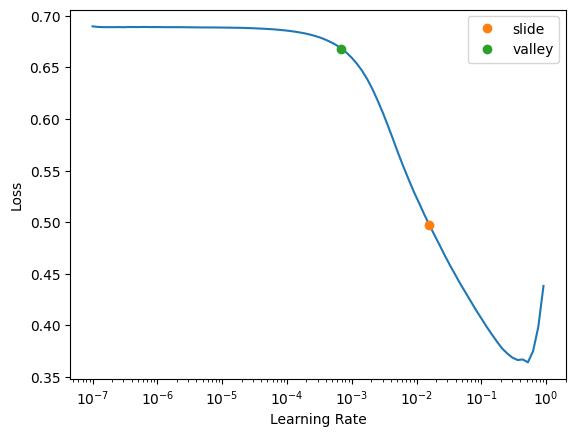

In [32]:
learner.lr_find(suggest_funcs=[slide, valley])

In [33]:
learner.fit_one_cycle(2, 8.245e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.068419,0.064544,0.975871,02:48
1,0.055178,0.053445,0.978129,02:46


In [34]:
learner.save("qa-classifier-bert-stage-0")

Path('models/qa-classifier-bert-stage-0.pth')

In [35]:
learner.export("models/qa-classifier-bert-stage-0.pkl")

# Stage - 1

In [ ]:
# learner.load("qa-classifier-bert-stage-0")

In [36]:
learner.unfreeze()

SuggestedLRs(slide=0.004365158267319202, valley=8.31763736641733e-06)

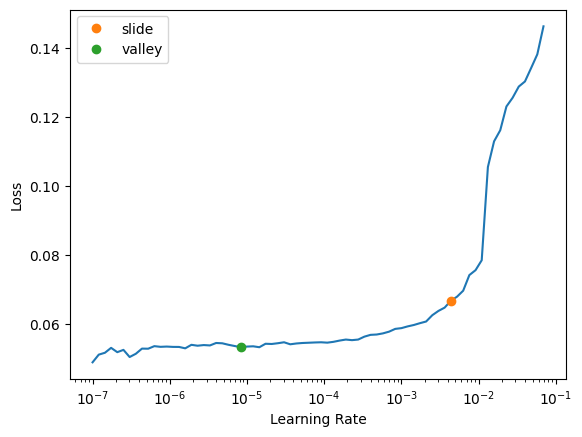

In [37]:
learner.lr_find(suggest_funcs=[slide, valley])

In [38]:
learner.fit_one_cycle(3,slice(3.3e-3, 8.41e-06))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.056367,0.055134,0.980344,03:19
1,0.041818,0.043212,0.982968,03:18
2,0.031149,0.040718,0.983173,03:20


In [39]:
learner.save("qa-classifier-bert-stage-1")

Path('models/qa-classifier-bert-stage-1.pth')

In [40]:
learner.export("models/qa-classifier-bert-stage-1.pkl")